# Face Detection in images (face_recognition, plt)

In [ ]:
import face_recognition
import matplotlib.pyplot as plt
import matplotlib.patches as patches

%matplotlib inline

In [ ]:
location = 'abba.png'

In [ ]:
def detect_faces(location):
    image = face_recognition.load_image_file(location)
    face_locations = face_recognition.face_locations(image)
    return image, face_locations
    

def plot_rectangles(ax, face_locations):
    for face_location in face_locations:
        top, right, bottom, left = face_location
        rect = patches.Rectangle((left,bottom),bottom-top,left-right,linewidth=1,edgecolor='r',facecolor='none')
        ax.add_patch(rect)


image, face_locations = detect_faces(location)

fig,ax = plt.subplots(1, figsize=(15,7))
ax.imshow(image)
plot_rectangles(ax, face_locations)

# Face Detection with camera (cvloop, cv2, face_recognition)

For display inside jupyter notebooks

In [51]:
import cv2
from cvloop import cvloop
import face_recognition
import numpy as np
import matplotlib.pyplot as plt

In [152]:
def face_detect(frame):
    
    #Face detection (returns list of tuples where a face is detected)
    face_locations = face_recognition.face_locations(frame)
    
    #Draw a rectangle after up-scaling coordinated
    for (t,r,b,l) in face_locations:
        frame = cv2.rectangle(frame, (l, t), (r, b), (0,0,255), 2)
    return frame

<IPython.core.display.Javascript object>


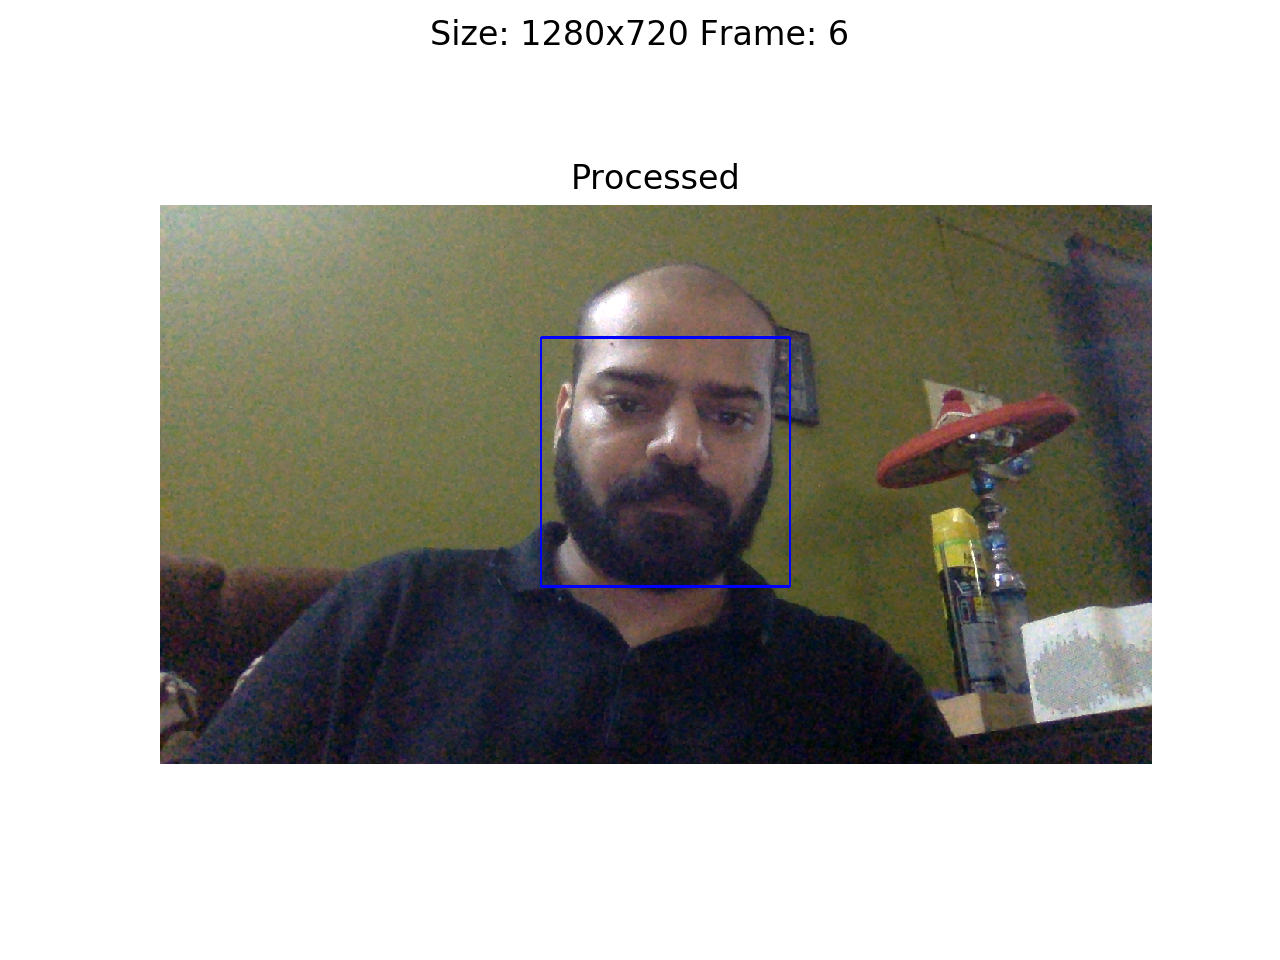

In [153]:
cvloop(function=face_detect)  #for video feed

#cvloop(function=face_detect)  #for camera feed

In [154]:
def face_landmarks(frame):

    #Face detection (returns list of tuples where a face is detected)
    face_landmarks = face_recognition.face_landmarks(frame)
    
    #Draw a rectangle after up-scaling coordinated
    for i in face_landmarks:
        for j in list(i.values()):
            pts = np.array(j, np.int32)
            frame = cv2.polylines(frame, [pts], False, (0,255,255), 3)
            
    return frame

<IPython.core.display.Javascript object>


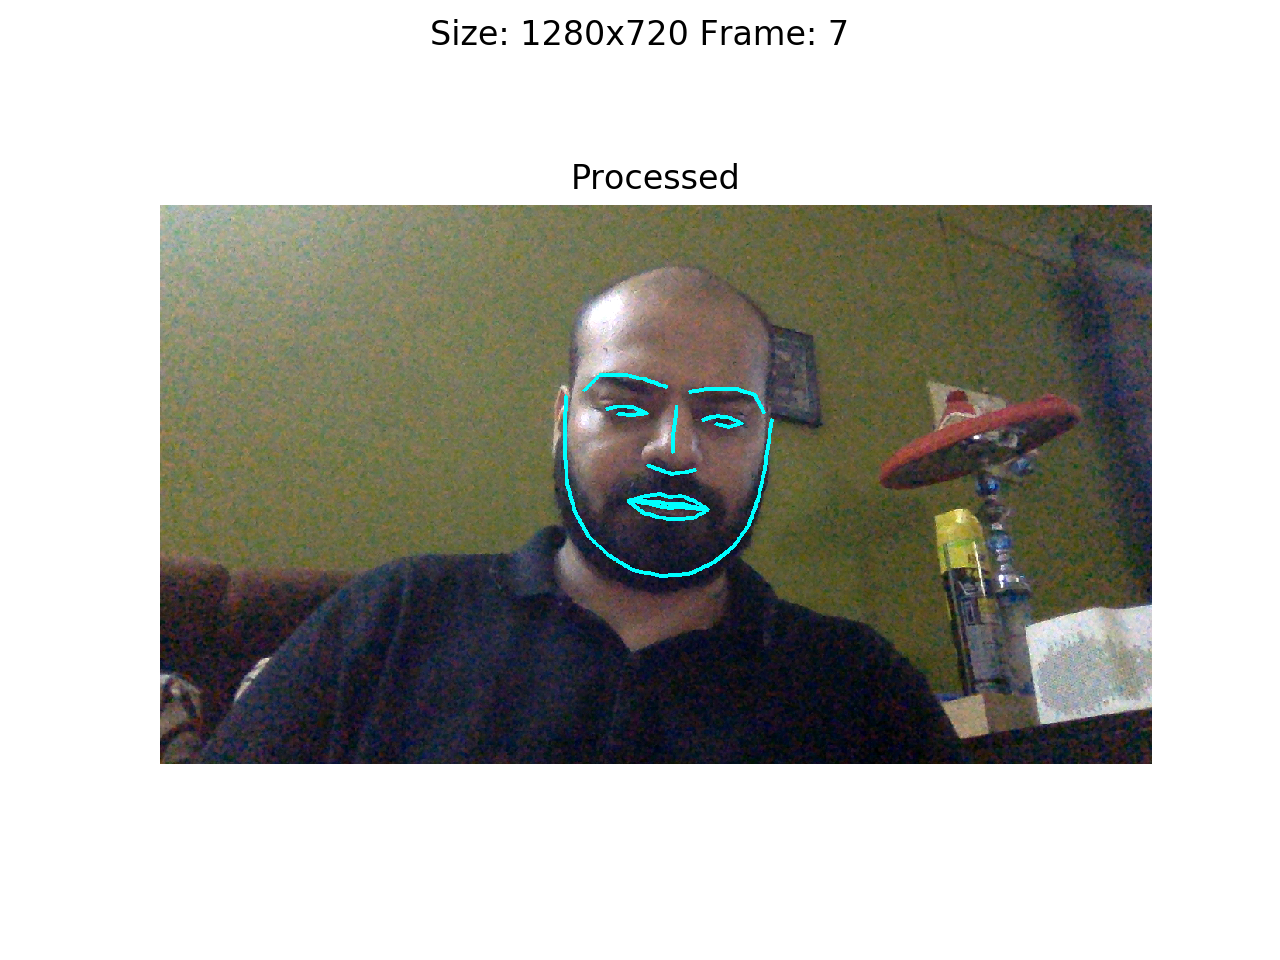

In [155]:
cvloop(function=face_landmarks)

In [156]:
known_image = face_recognition.load_image_file("sample_images/akshay.jpg")
known_encoding = face_recognition.face_encodings(known_image)[0]

In [159]:
def face_recog(frame):

    #Compare encodings
    unknown_encoding = face_recognition.face_encodings(frame)[0]
    results = face_recognition.compare_faces([known_encoding], unknown_encoding)
    
    if results[0] == True:
        name = 'Akshay'
    else:
        name = 'Unknown'
    
    frame = cv2.putText(frame, name,(10,500), cv2.FONT_HERSHEY_SIMPLEX, 3, 255, thickness=2)
    return frame

<IPython.core.display.Javascript object>


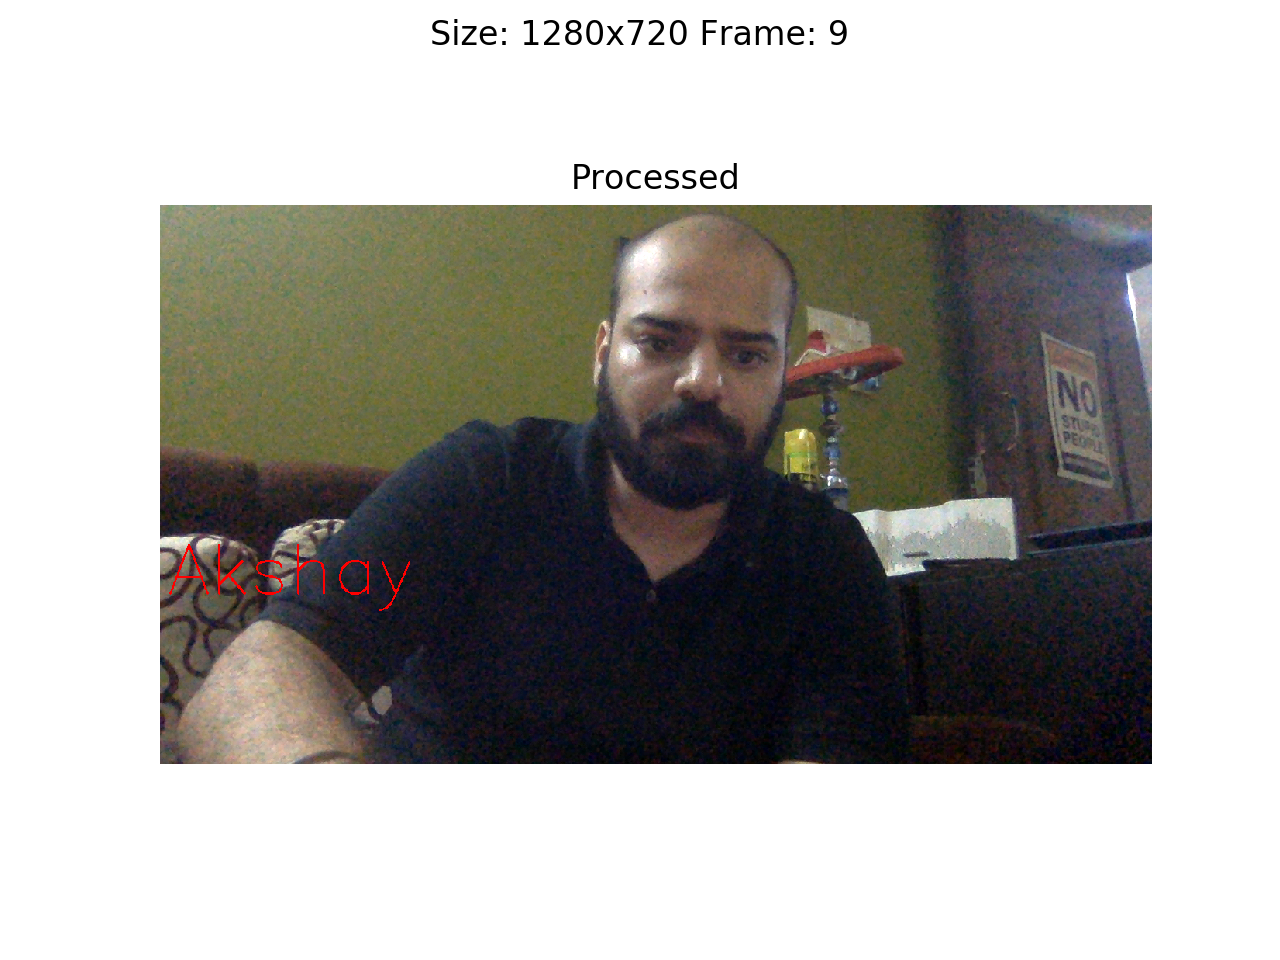

In [160]:
cvloop(function=face_recog)